This is E-commerce sales dataset downoladed from this link [https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data]

In [349]:
#Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [75]:
#import Amazon sale report

amznreport = pd.read_csv("Amazon Sale Report.csv", parse_dates = ["Date"])

C:\Users\newes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

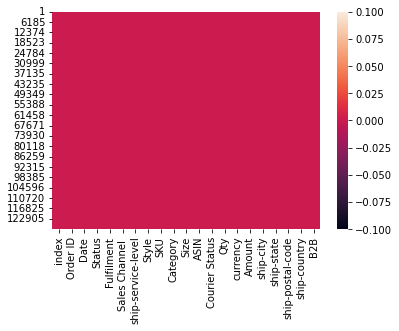

In [80]:
#produce heatmap, to visualize the missing data
sns.heatmap(amznreport.isnull())

In [216]:
#Data cleaning process
amznreport.drop(columns = ["fulfilled-by", "promotion-ids", "Unnamed: 22"], inplace =True)
amznreport.dropna(inplace = True)
amznreport["Category"] = amznreport["Category"].astype("category")
amznreport["Courier Status"] = amznreport["Courier Status"].astype("category")
amznreport["Fulfilment"] = amznreport["Fulfilment"].astype("category")
amznreport["Status"] = amznreport["Status"].astype("category")
amznreport["Qty"] = amznreport["Qty"].astype("category")
amznreport.set_index("Date").sort_index(inplace = True)

KeyError: "['fulfilled-by' 'promotion-ids' 'Unnamed: 22'] not found in axis"

In [239]:
#Quick insights
sum_of_sales = amznreport["Amount"].sum()
average_of_sales = amznreport["Amount"].mean()
max_amount_sales = amznreport["Amount"].max()
min_amount_sales = amznreport["Amount"].min()

#Filters
mask1 = amznreport["Date"]
mask2 = amznreport["Fulfilment"]
mask3 = amznreport["B2B"]

#sales by Date
sum_sales_per_date = amznreport["Amount"].groupby(by = mask1).sum()
mean_sales_per_date = amznreport["Amount"].groupby(by = mask1).mean()
max_sales_per_date = amznreport["Amount"].groupby(by = mask1).max()
min_sales_per_date = amznreport["Amount"].groupby(by = mask1).min()

#sales by Fulfilment
sum_sales_per_fulfil = amznreport["Amount"].groupby(by = mask2).sum()
mean_sales_per_fulfil = amznreport["Amount"].groupby(by = mask2).mean()
max_sales_per_fulfil = amznreport["Amount"].groupby(by = mask2).max()
min_sales_per_fulfil = amznreport["Amount"].groupby(by = mask2).min()

#sales by B2B
sum_sales_per_B2B = amznreport["Amount"].groupby(by = mask3).sum()
mean_sales_per_B2B = amznreport["Amount"].groupby(by = mask3).mean()

#ratio between Amazon and Merchant sales
ratio_fulfil = amznreport["Amount"].groupby(by = mask2).sum()/(amznreport["Amount"].sum())
ratio_B2B =  amznreport["Amount"].groupby(by = mask3).sum()/(amznreport["Amount"].sum())


In [289]:
#create new table (Date, Total sales per day , Average sales per day)

sum_sales= np.array(amznreport["Amount"].groupby(by = mask1).sum())
average_sales = np.array(amznreport["Amount"].groupby(by = mask1).mean())
dates_unique = np.array(amznreport["Date"].unique())
amzn_unique = pd.DataFrame()
amzn_unique["Date"] = pd.Series(dates_unique)
amzn_unique["Total sales"] = pd.Series(sum_sales)
amzn_unique["Average sales"] =pd.Series(average_sales)
amzn_unique.set_index("Date").sort_index(inplace = True)


In [379]:
#Checking the month of dates
month = []
for i in amzn_unique["Date"]:
    if i <  dt.datetime(2022, 4, 1):
        month.append("March")
    elif dt.datetime(2022, 4, 1) <= i < dt.datetime(2022, 5, 1):
        month.append("April")
    elif dt.datetime(2022, 5, 1) <= i < dt.datetime(2022, 6, 1):
        month.append("May")
    else:
        month.append("June")
        
 #Add a new column (i.e.month)      
amzn_unique["month"] =  month

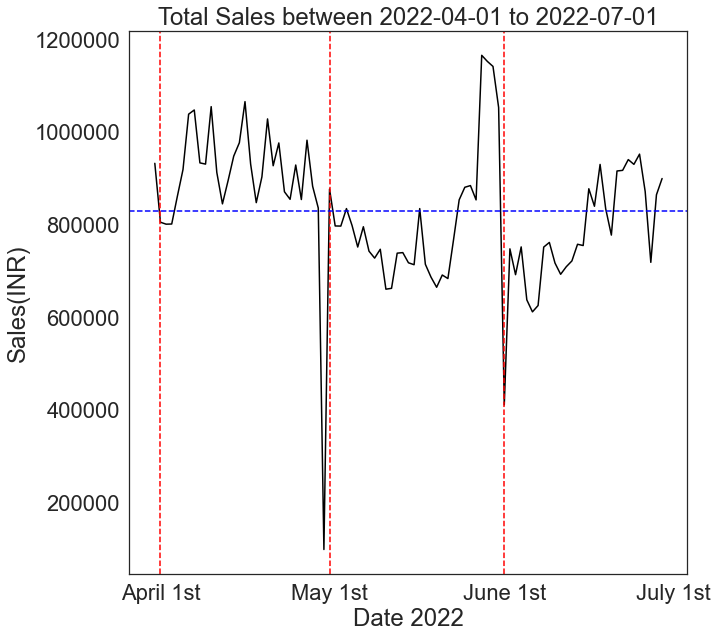

In [459]:
#plotting sales vs date
fig, ax = plt.subplots()
sns.set_theme(style="white", rc = {"figure.figsize":(10, 10)}, font_scale= 2 ) #width = 5 #height = 4
fig = sns.lineplot(data = amzn_unique, x="Date", y="Total sales", color = "black")
ax.set_xticks(ticks = ["2022-04-01","2022-05-01","2022-06-01", "2022-07-01"])
fig.set_xticklabels(["April 1st", "May 1st", "June 1st", "July 1st"])
plt.ticklabel_format(style='plain', axis='y')
fig.set(xlabel = "Date 2022", ylabel="Sales(INR)", title = "Total Sales between 2022-04-01 to 2022-07-01")
fig.axvline(x = ["2022-04-01"], color ="red",linestyle = '--' )
fig.axvline(x = ["2022-05-01"], color ="red",linestyle = '--' )
fig.axvline(x = ["2022-06-01"], color ="red",linestyle = '--' )
fig.axhline(y= 828406.3186813187, color ="blue",linestyle = '--')